<a href="https://colab.research.google.com/github/ashfaquesayyed/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [2]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/data folder/data_YesBank_StockPrices.csv")

##Data Inspection

In [6]:
#dataset
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [7]:
#checking dataset shape
df.shape

(185, 5)

In [8]:
#informtion of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##Data Set Information

Date: It specifies the month and year of particular price.



Open: it specifies the opening price of the stock in that month.(Numeric)

High: it specifies the highest price of stock in that month.(Numeric)

Low: it specifies the lowest price of stock in that month.(Numeric)

Close: it specifies the close price of stock in that month.(Numeric)

In [9]:
#unique values
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [10]:
#checking duplicate values
df[df.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
#checking data description
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [12]:
#Changing the date into numbers
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

#Exploratory Data Analysis

## Plot of Close Price

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

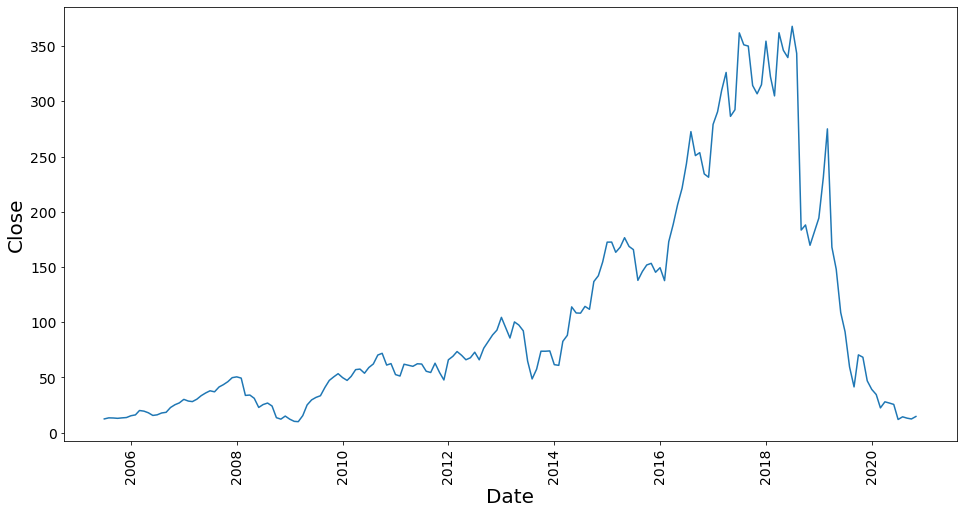

In [13]:
#figure size
plt.figure(figsize=(16,8))

#Plotting date vs close price graph
sns.lineplot(x=df['Date'], y=df['Close'])

#labelling
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* The above graph shows the variation of close price of yes bank stock price with respect to year. 

* We can see the peak is high in year between 2017 to 2019
* Low is in start of year 2006, 2009 and after 2020.
* There is a sudden change after year of 2014

##Plot of all the Prices against Date

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

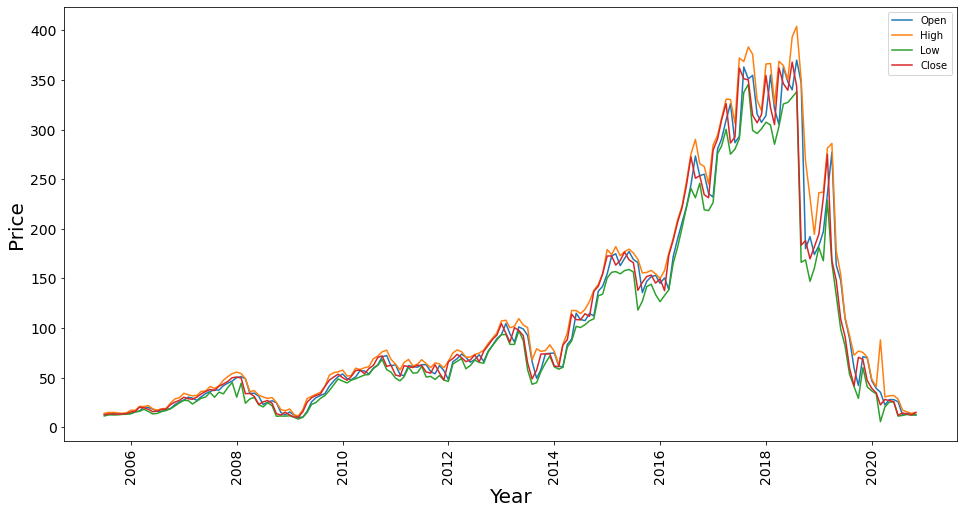

In [14]:
#Grouping of all columns
all_plot =df.groupby(['Date']).agg({'Open':"sum",'High':"sum",'Low':"sum",'Close':"sum"})

#figure size
plt.figure(figsize=(16,8))

#plotting line graph
sns.lineplot(data=all_plot, dashes= False)

#labelling
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


* The above graph shows the variation of  opening price,high, low and close of stock price.

* All features have similar characteristics.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

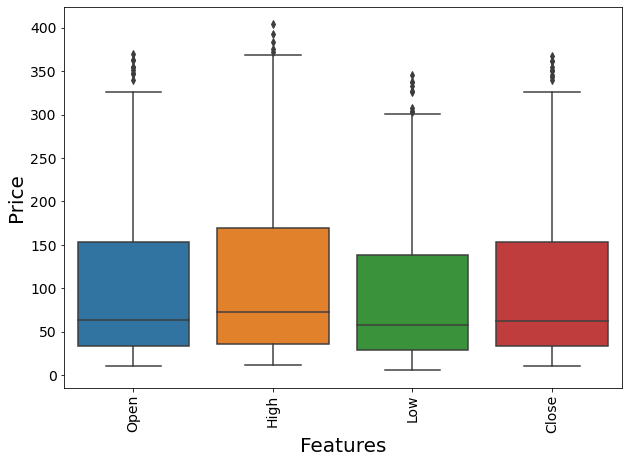

In [15]:
#figure size
plt.figure(figsize=(10,7))

#plot
sns.boxplot(data= df)

#labelling
plt.xlabel('Features', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* Outliers are present in the data.
* Open and Close have very similar values.
* The median of the close price is around 60.

##Histogram of dependent variable "Close Price"

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 ]),
 <a list of 6 Text major ticklabel objects>)

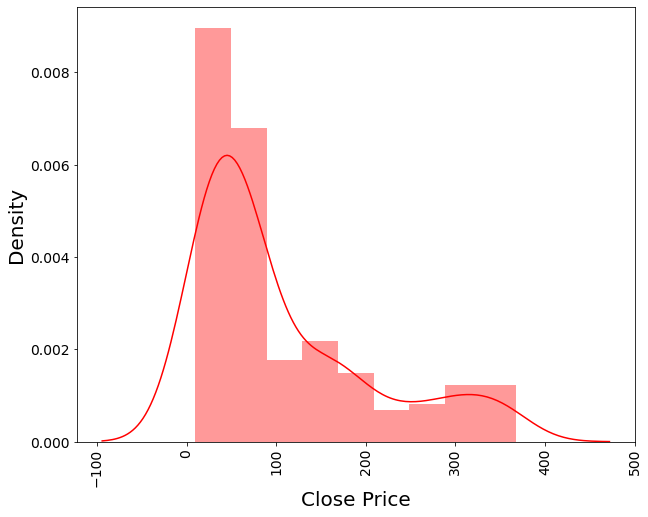

In [16]:
#figure size
plt.figure(figsize=(10,8))

#PLotting histogram
sns.distplot(df['Close'], color= 'r')

#labelling
plt.xlabel('Close Price', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* Above graph shows that dependent values is positively skewed. applying log transformation to data to make it normal distribution.

##Applying Log Transformation in "Close Price"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text major ticklabel objects>)

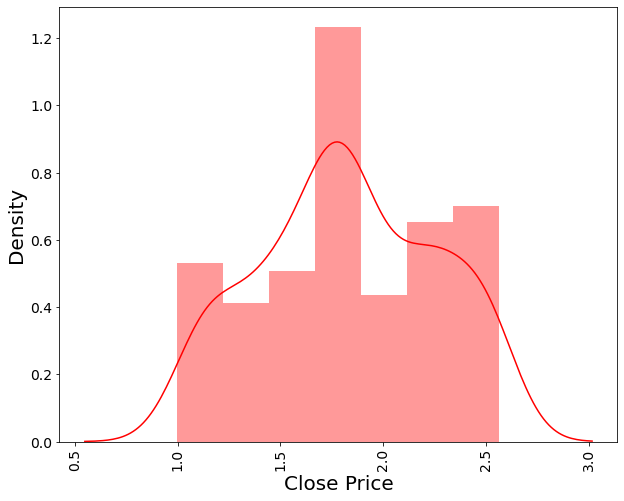

In [17]:
#figure size
plt.figure(figsize=(10,8))

#plot after applying log 10
sns.distplot(np.log10(df['Close']), color= 'r')

#labelling
plt.xlabel('Close Price', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

After applying log transformation. Data is normally distributed of close price.

##Histogram of Independent variable

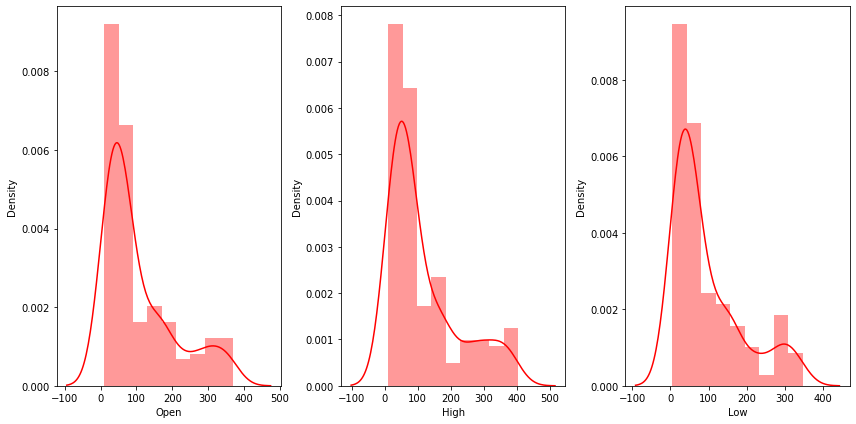

In [18]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(df['Open'], color='r', ax=axs[0])
sns.distplot(df['High'], color='r', ax=axs[1])
sns.distplot(df['Low'], color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

* Other features i.e. independent variable are also positvely skewed.
The above histogram shows data distribution of open, high and low.

##Applying log transformation in Independent variable

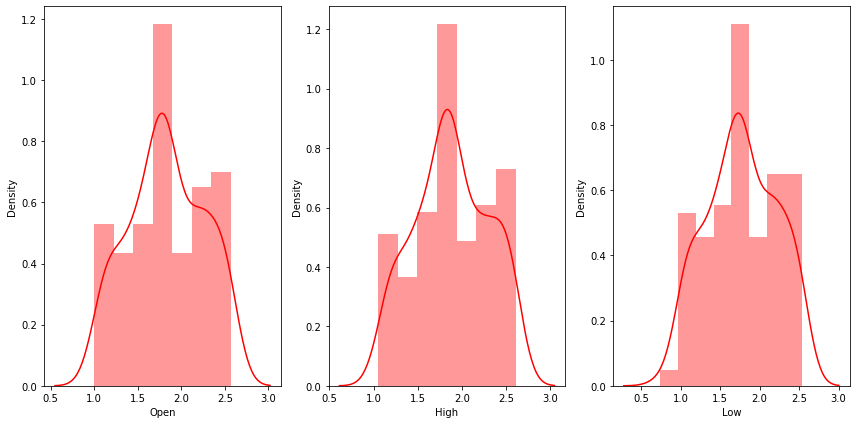

In [19]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(np.log10(df['Open']), color='r', ax=axs[0])
sns.distplot(np.log10(df['High']), color='r', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

The independent data is normal distributed after applying log transformation.

##Scatter Plot with best fit line

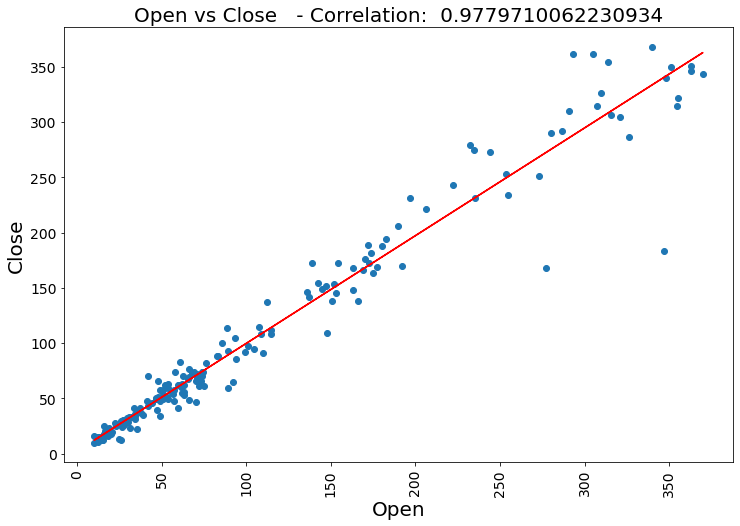

In [20]:

stock_close=df['Close']
#correlation of Open and Close Price
correlation= df['Open'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Open'], y= df['Close'])

#title set
ax.set_title("Open vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Open', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#Font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Open"])

plt.plot(df["Open"], y_hat, "r-", lw=1.5)

 The above scatter plot shows the variation of yes bank stock open price against closing price.

* 'open price' is linearly correlated( correlation 0.9779) with the dependent variable (close price).

* Small amount of Outliers are also present.

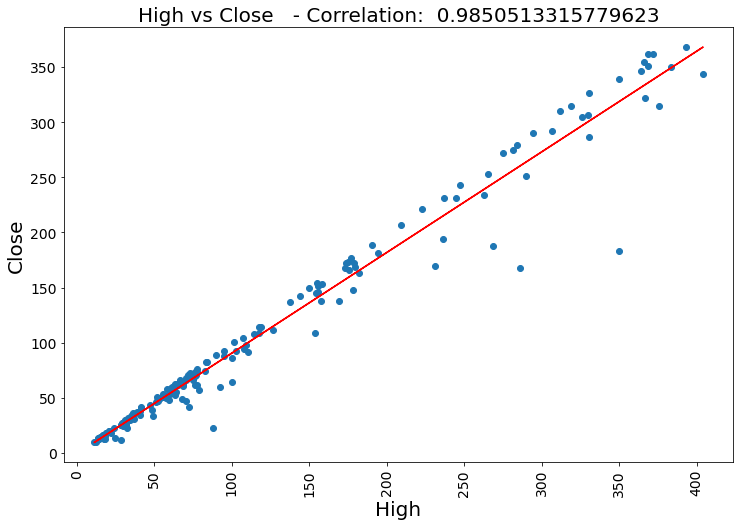

In [21]:
stock_close=df['Close']

#correlation of High and Close Price
correlation= df['High'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['High'], y= df['Close'])

#setting title
ax.set_title("High vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('High', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df["High"])

plt.plot(df["High"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'high price' against closing price. The 'High price' is linearly correlated (0.9850) with the dependent variable (close price).

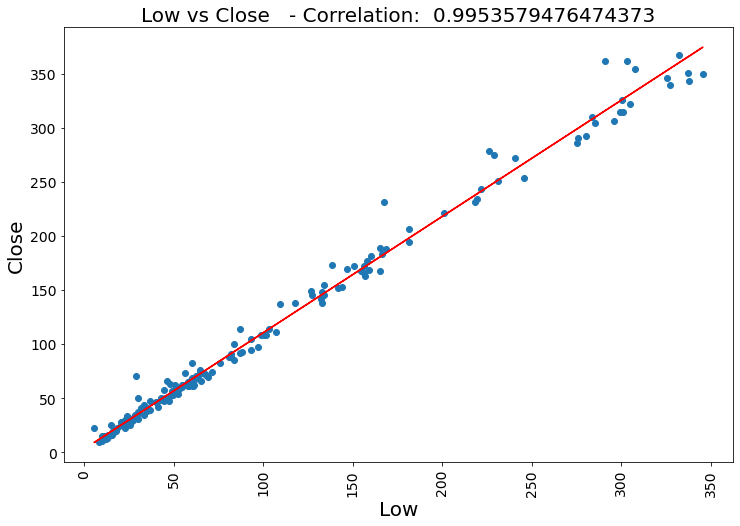

In [22]:
stock_close=df['Close']

#correlation of Low and Close Price
correlation= df['Low'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Low'], y= df['Close'])

#setting title
ax.set_title("Low vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Low', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Low"])

plt.plot(df["Low"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'low price' against 'close price'. The 'High price' is linearly correlated (0.9953) with the dependent variable (close price).

##Correlation with heat map